# (Optional) Colab Setup
If you aren't using Colab, you can delete the following code cell. This is just to help students with mounting to Google Drive to access the other .py files and downloading the data, which is a little trickier on Colab than on your local machine using Jupyter.

In [1]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/content/drive/MyDrive/CS444/assignment4"
if not os.path.exists(datadir):
  !ln -s "/content/drive/MyDrive/path_to/assignment4" $datadir # TODO: Fill your Assignment 4 path
os.chdir(datadir)
!pwd

/content/drive/MyDrive/CS444/assignment4


# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [4]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [5]:
from gan.train import train
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss
from gan.utils import show_images

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


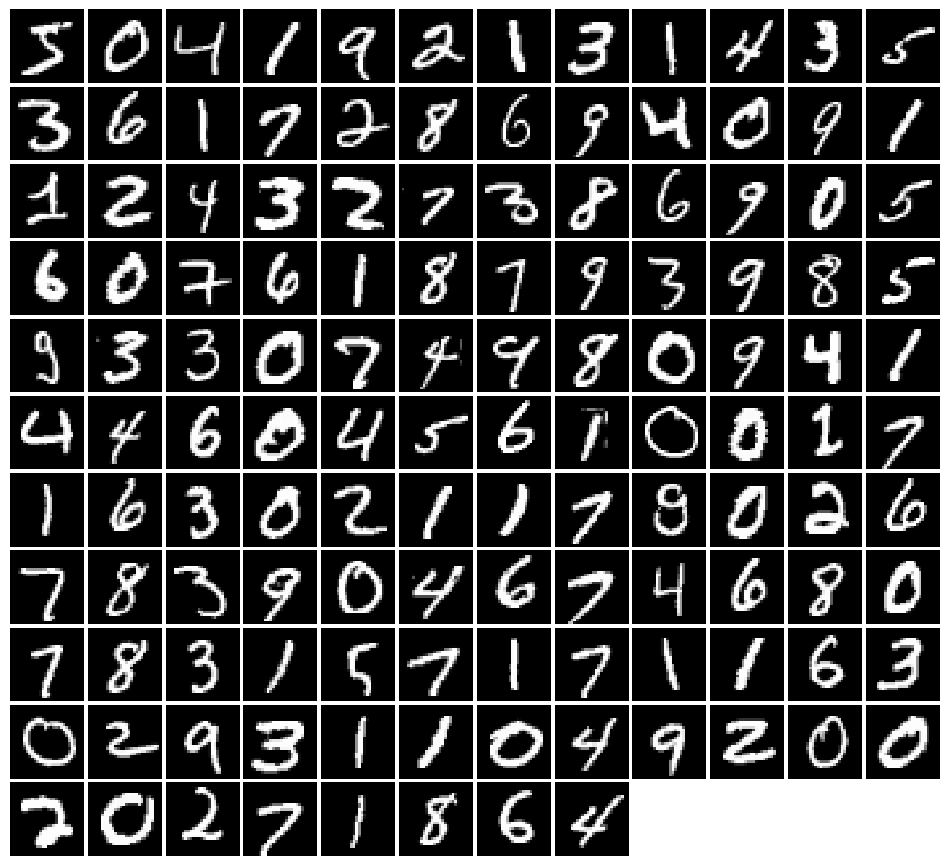

In [7]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)

try:
  imgs = next(iter(loader_train))[0].view(batch_size, 784).numpy().squeeze()
except:
  imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()

show_images(imgs)

# Discriminator and Generator


In [13]:
class Flatten(nn.Module):
    def forward(self, x):
        #N, C, H, W = x.size() # read in N, C, H, W
        N = x.size()[0]
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [14]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256),
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256),
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [15]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """

    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="gan_samples/mnist.jpg" width=500>

EPOCH: 1
Iter: 0, D: 0.6948, G:0.6934


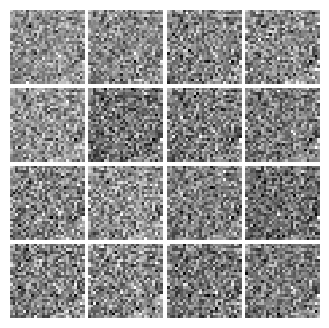


Iter: 250, D: 0.6238, G:1.176


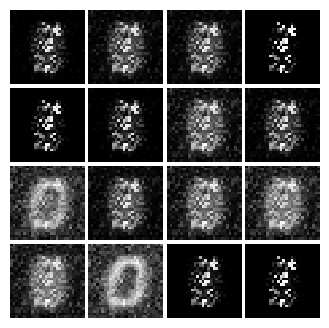


EPOCH: 2
Iter: 500, D: 0.4202, G:1.139


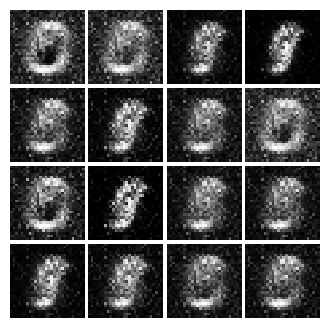


Iter: 750, D: 0.8235, G:0.5486


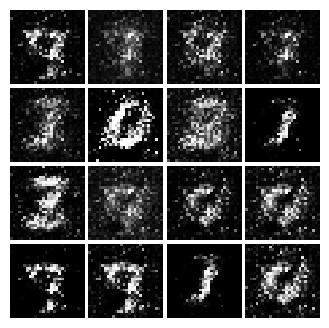


EPOCH: 3
Iter: 1000, D: 0.4791, G:1.402


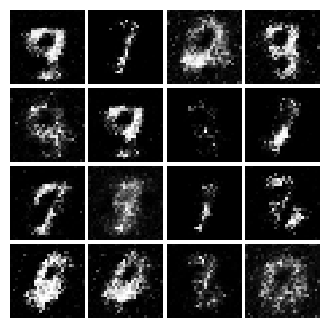


Iter: 1250, D: 0.538, G:1.183


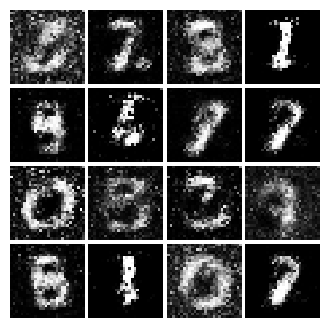


EPOCH: 4
Iter: 1500, D: 0.5237, G:1.524


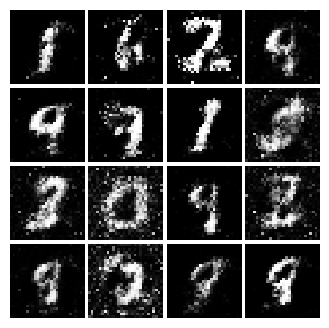


Iter: 1750, D: 0.6294, G:0.8728


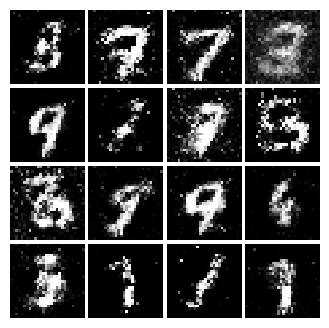


EPOCH: 5
Iter: 2000, D: 0.6228, G:0.918


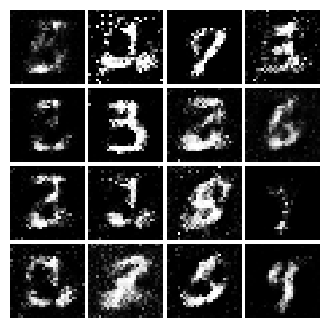


Iter: 2250, D: 0.6174, G:1.039


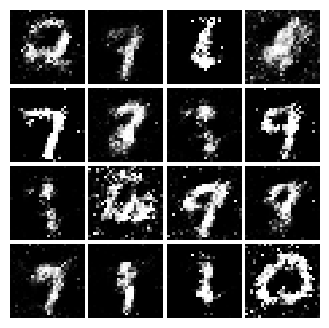


EPOCH: 6
Iter: 2500, D: 0.6342, G:1.056


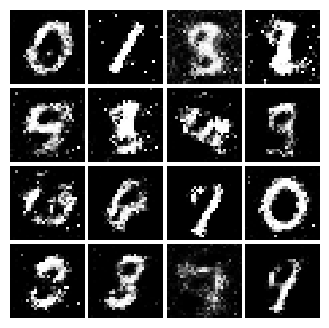


Iter: 2750, D: 0.6646, G:0.8771


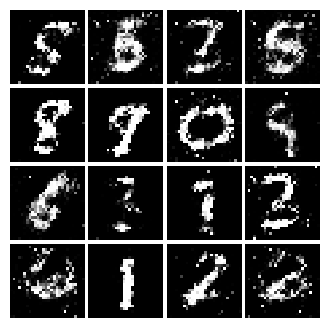


EPOCH: 7
Iter: 3000, D: 0.589, G:0.857


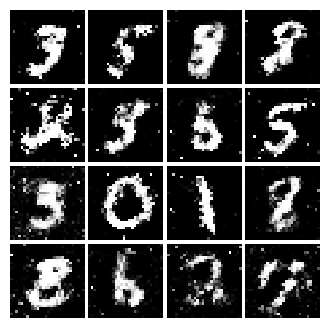


Iter: 3250, D: 0.6062, G:0.9575


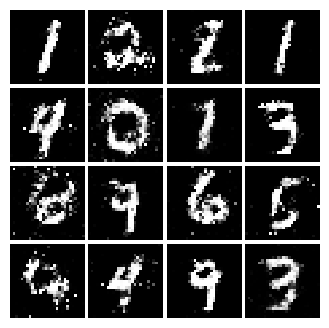


EPOCH: 8
Iter: 3500, D: 0.6387, G:0.8227


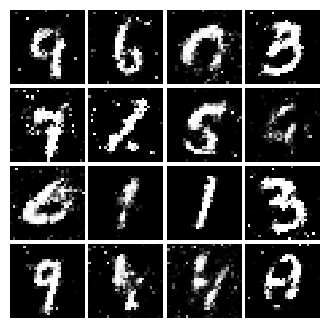


EPOCH: 9
Iter: 3750, D: 0.6277, G:0.8436


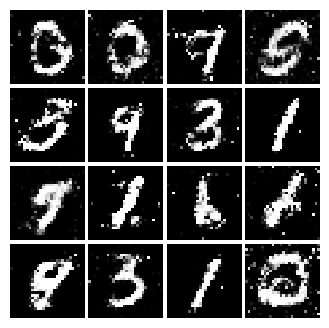


Iter: 4000, D: 0.6953, G:0.8387


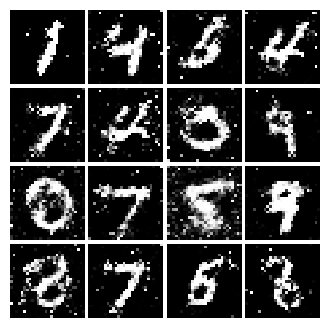


EPOCH: 10
Iter: 4250, D: 0.6297, G:0.8112


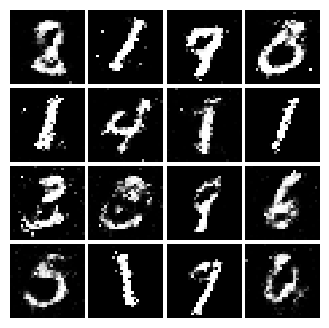


Iter: 4500, D: 0.6698, G:0.7901


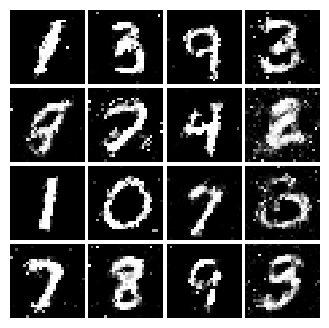

In [16]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH: 1
Iter: 0, D: 0.4648, G:0.443


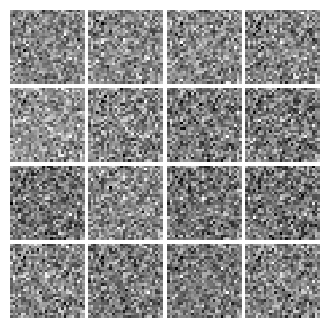


Iter: 250, D: 0.319, G:0.3783


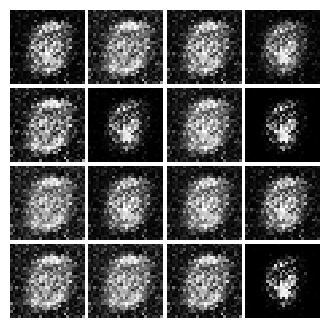


EPOCH: 2
Iter: 500, D: 0.09503, G:0.3762


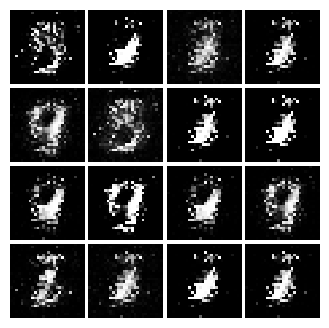


Iter: 750, D: 0.1568, G:0.2824


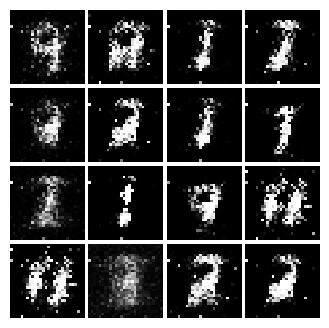


EPOCH: 3
Iter: 1000, D: 0.1557, G:0.2737


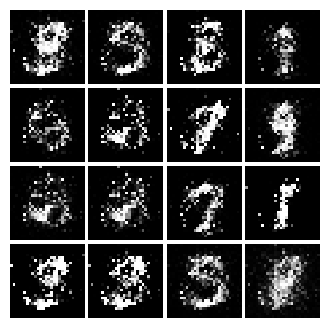


Iter: 1250, D: 0.1866, G:0.3214


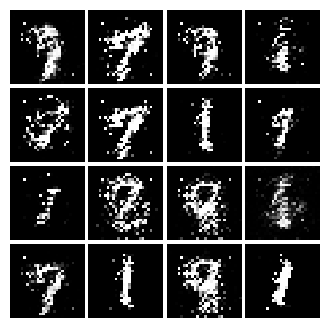


EPOCH: 4
Iter: 1500, D: 0.2173, G:0.2348


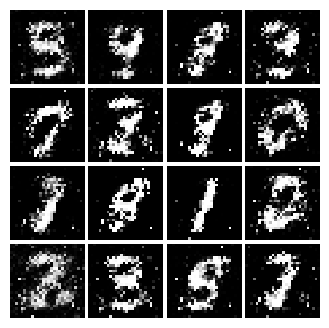


Iter: 1750, D: 0.1812, G:0.2134


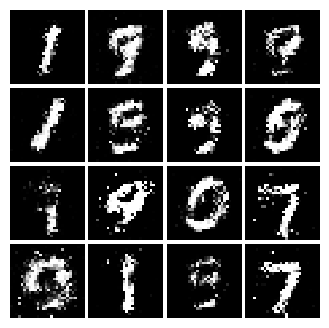


EPOCH: 5
Iter: 2000, D: 0.2176, G:0.1799


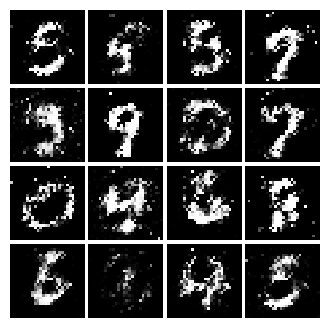


Iter: 2250, D: 0.2257, G:0.1976


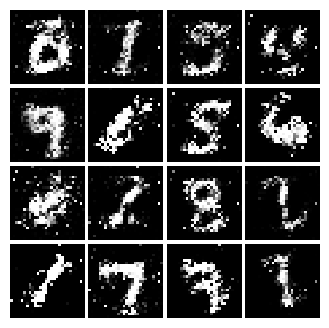


EPOCH: 6
Iter: 2500, D: 0.2024, G:0.1751


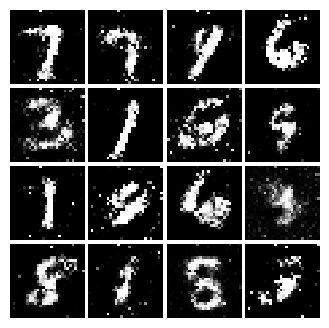


Iter: 2750, D: 0.2287, G:0.1556


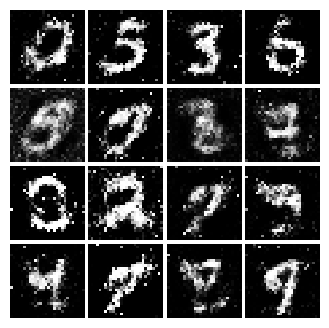


EPOCH: 7
Iter: 3000, D: 0.2346, G:0.1989


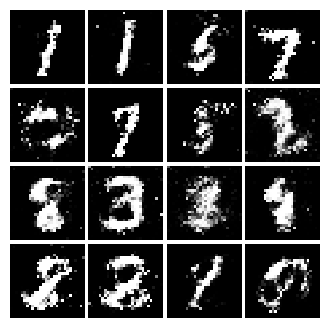


Iter: 3250, D: 0.2448, G:0.1754


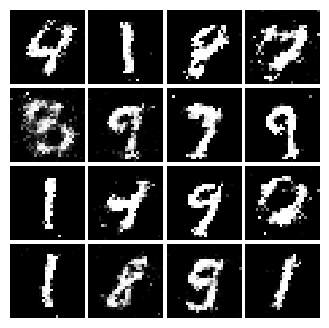


EPOCH: 8
Iter: 3500, D: 0.2497, G:0.1495


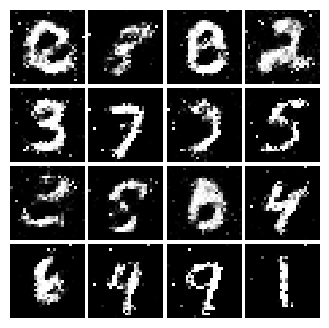


EPOCH: 9
Iter: 3750, D: 0.224, G:0.1761


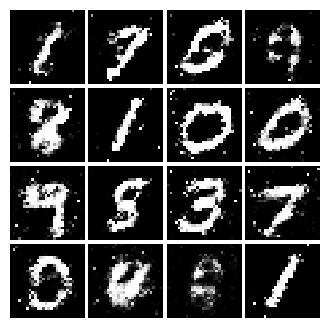


Iter: 4000, D: 0.2538, G:0.1601


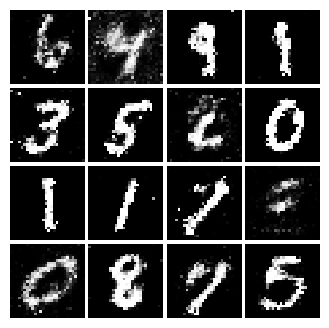


EPOCH: 10
Iter: 4250, D: 0.23, G:0.1756


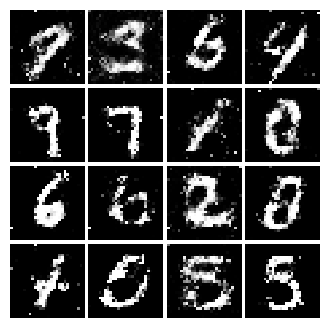


Iter: 4500, D: 0.2203, G:0.1588


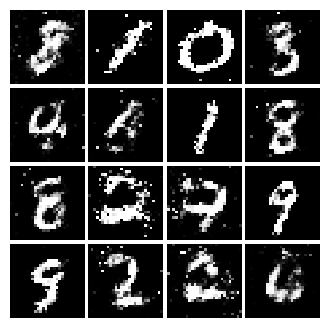

In [17]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)